In [5]:
#Load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [6]:
dataset=pd.read_csv('kmeans_dataset.csv', usecols=[2,3,4,5,6,7,8])
#only read collumns with numerical data

In [7]:
dataset.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


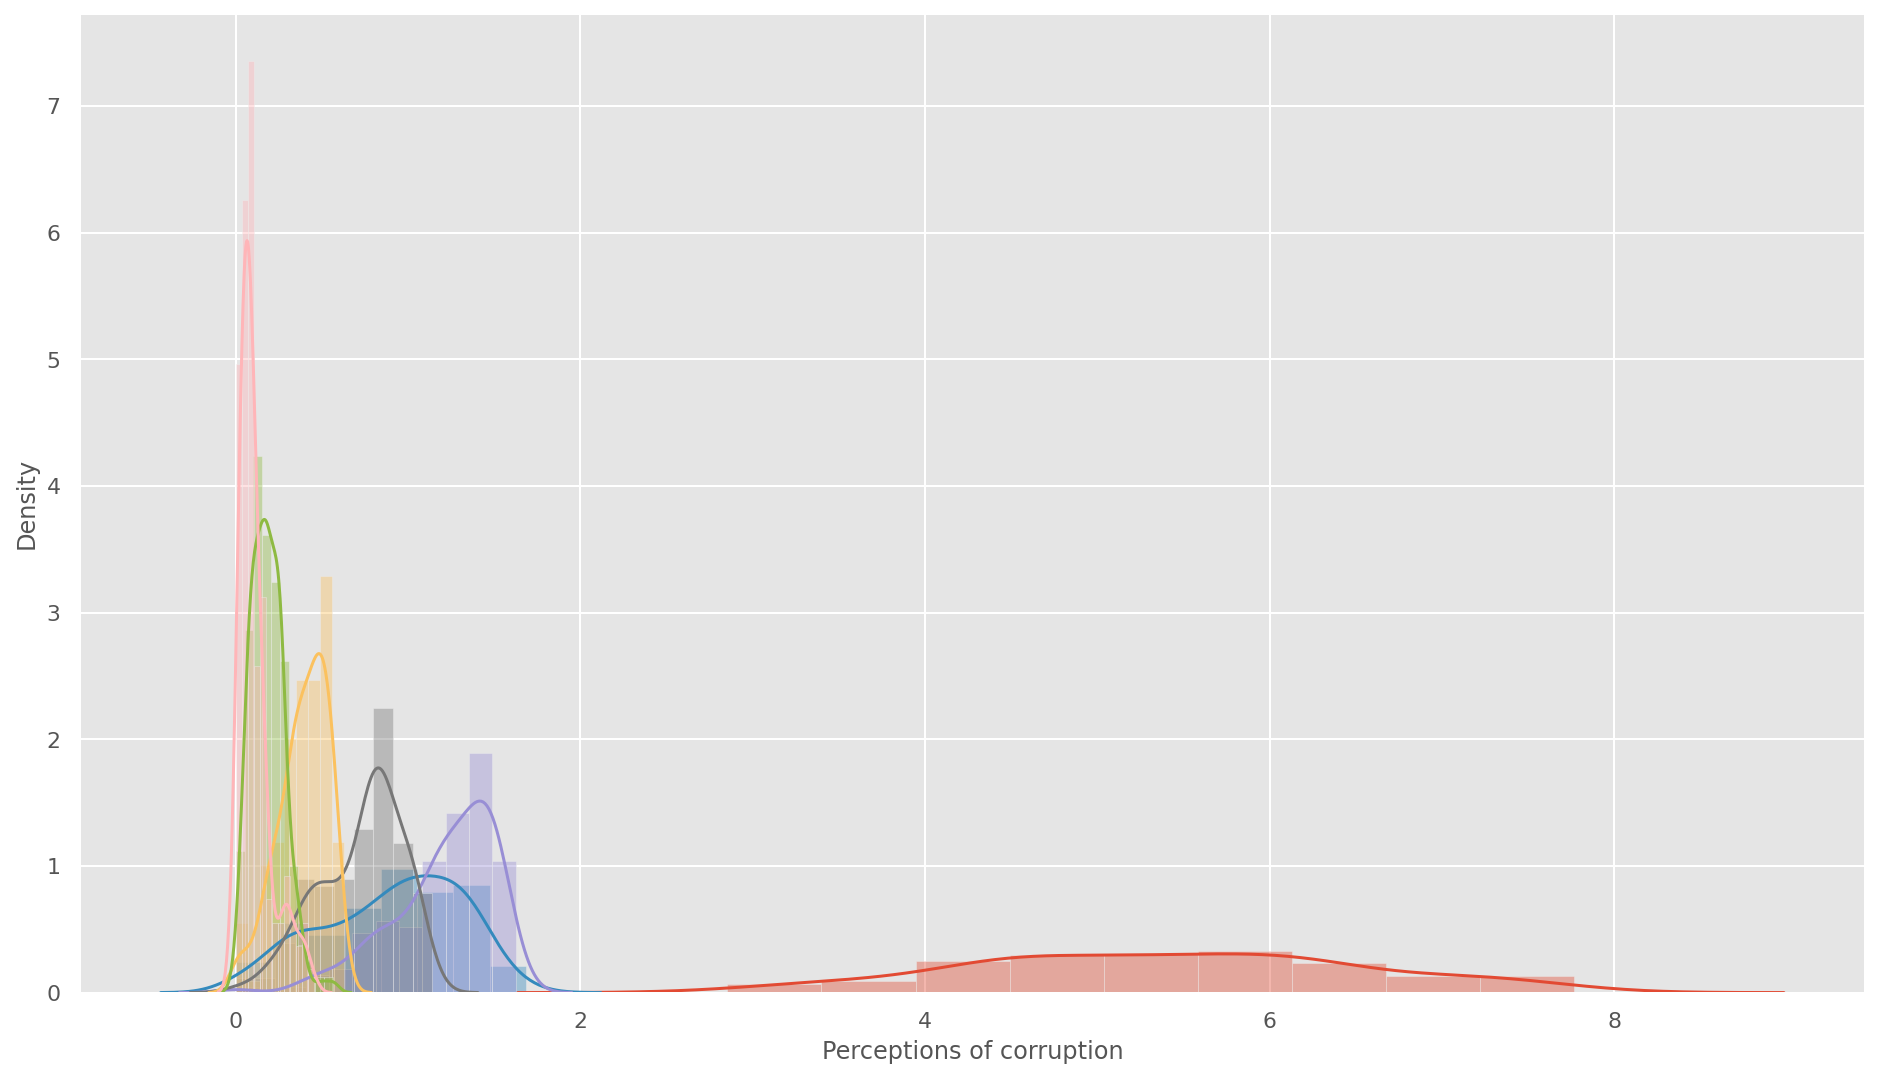

In [8]:
#Visualising the data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plot_score = sns.distplot(dataset["Score"])
plot_gdp = sns.distplot(dataset["GDP per capita"])
plot_social = sns.distplot(dataset["Social support"])
plot_health = sns.distplot(dataset["Healthy life expectancy"])
plot_freedom = sns.distplot(dataset["Freedom to make life choices"])
plot_gen = sns.distplot(dataset["Generosity"])
plot_precep = sns.distplot(dataset["Perceptions of corruption"])

In [9]:
#standardize features
from sklearn.preprocessing import StandardScaler
x=dataset.iloc[:,[0,6]].values
x=StandardScaler().fit_transform(x)

Text(0, 0.5, 'Second Principal Component')

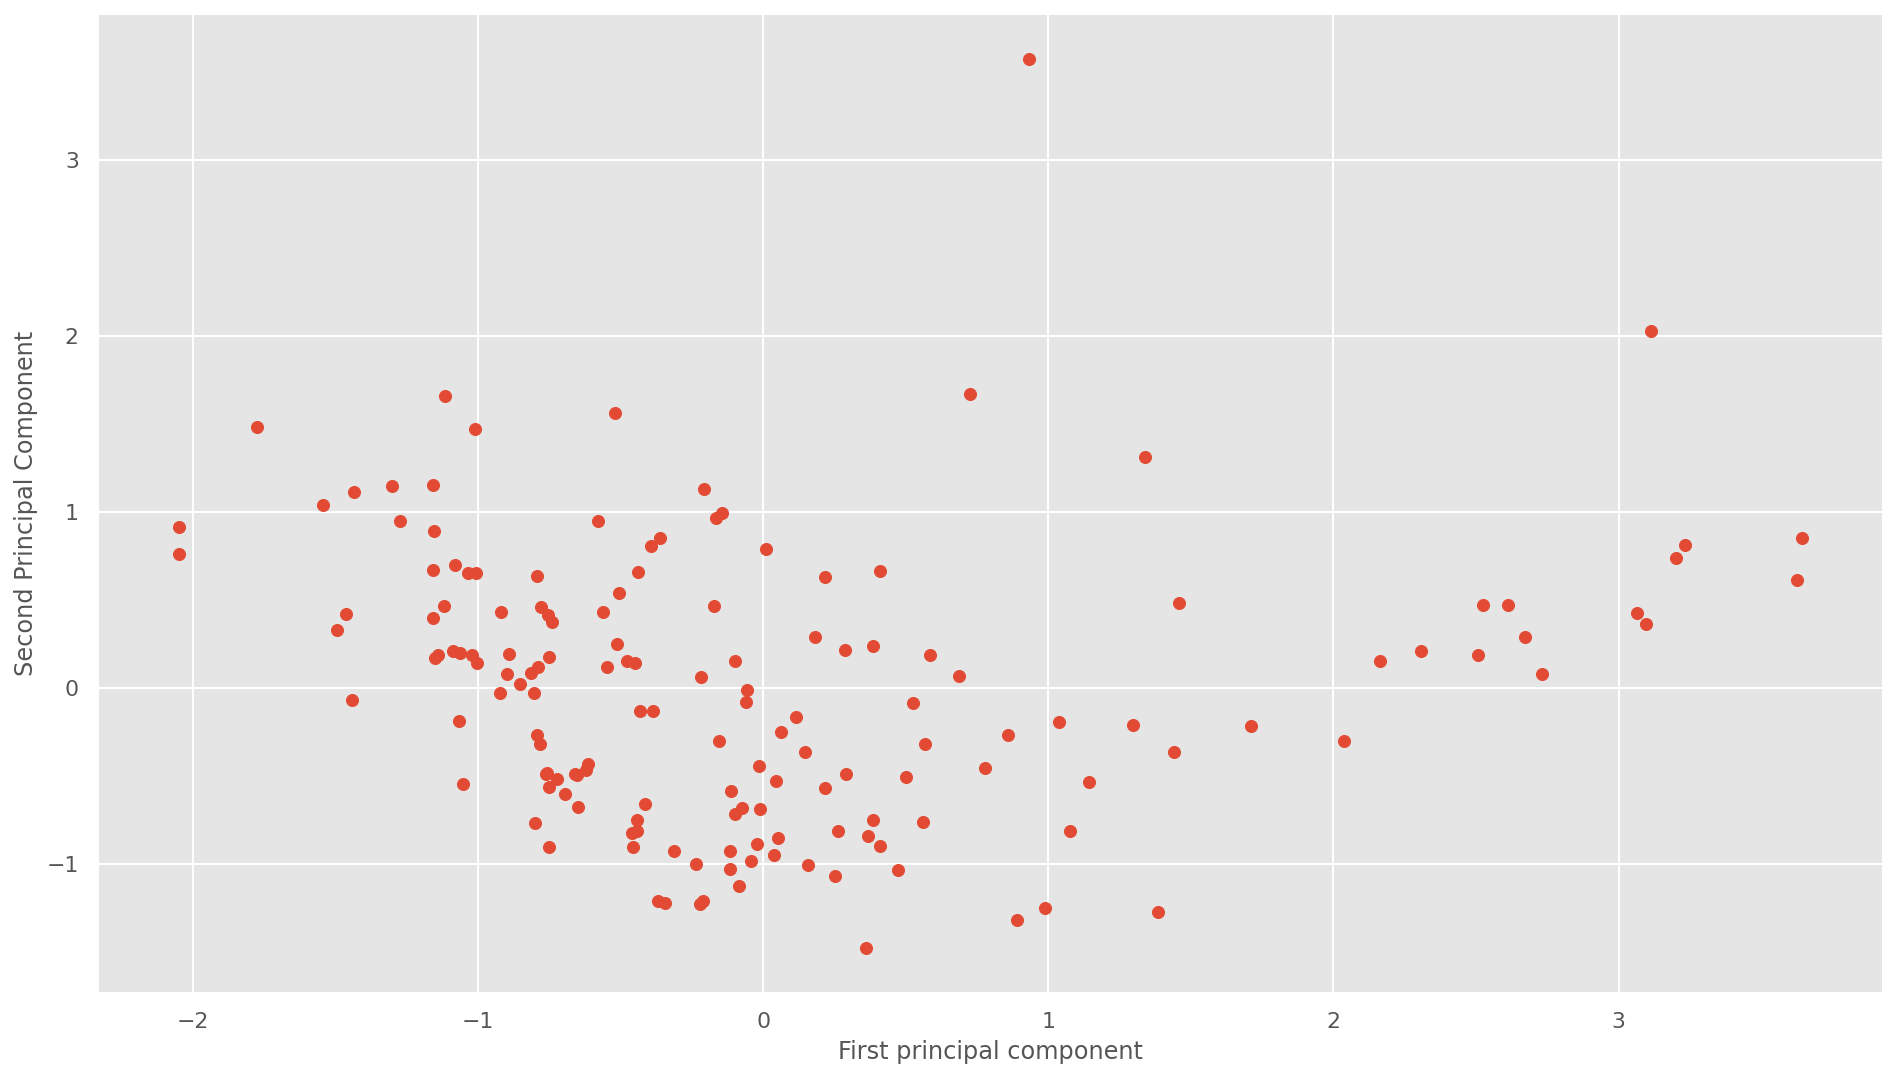

In [47]:
#PCA
from sklearn.decomposition import PCA

# Construct the PCA object
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
X = x_pca
target =[]

plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [48]:
#k-means clustering
from sklearn.cluster import KMeans
km4=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(x_pca)

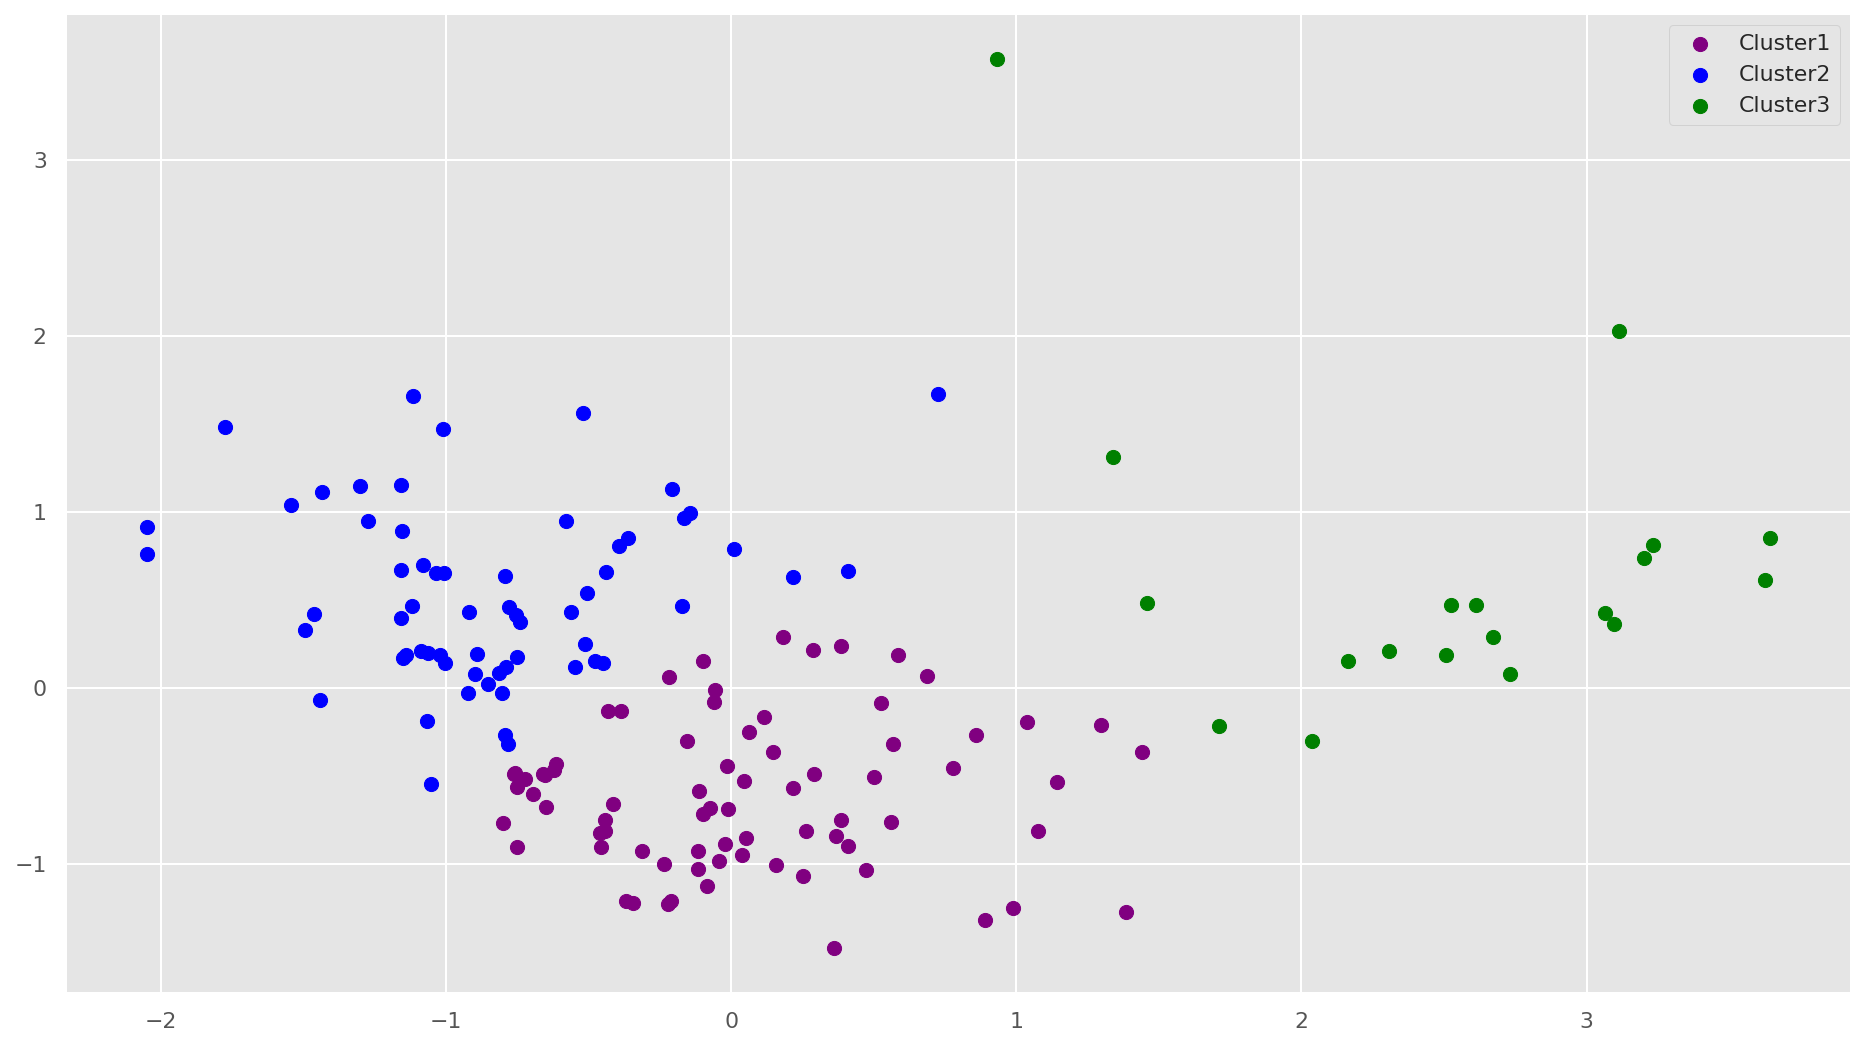

In [49]:
#Visualising the clusters for k=3
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.legend()
plt.show()

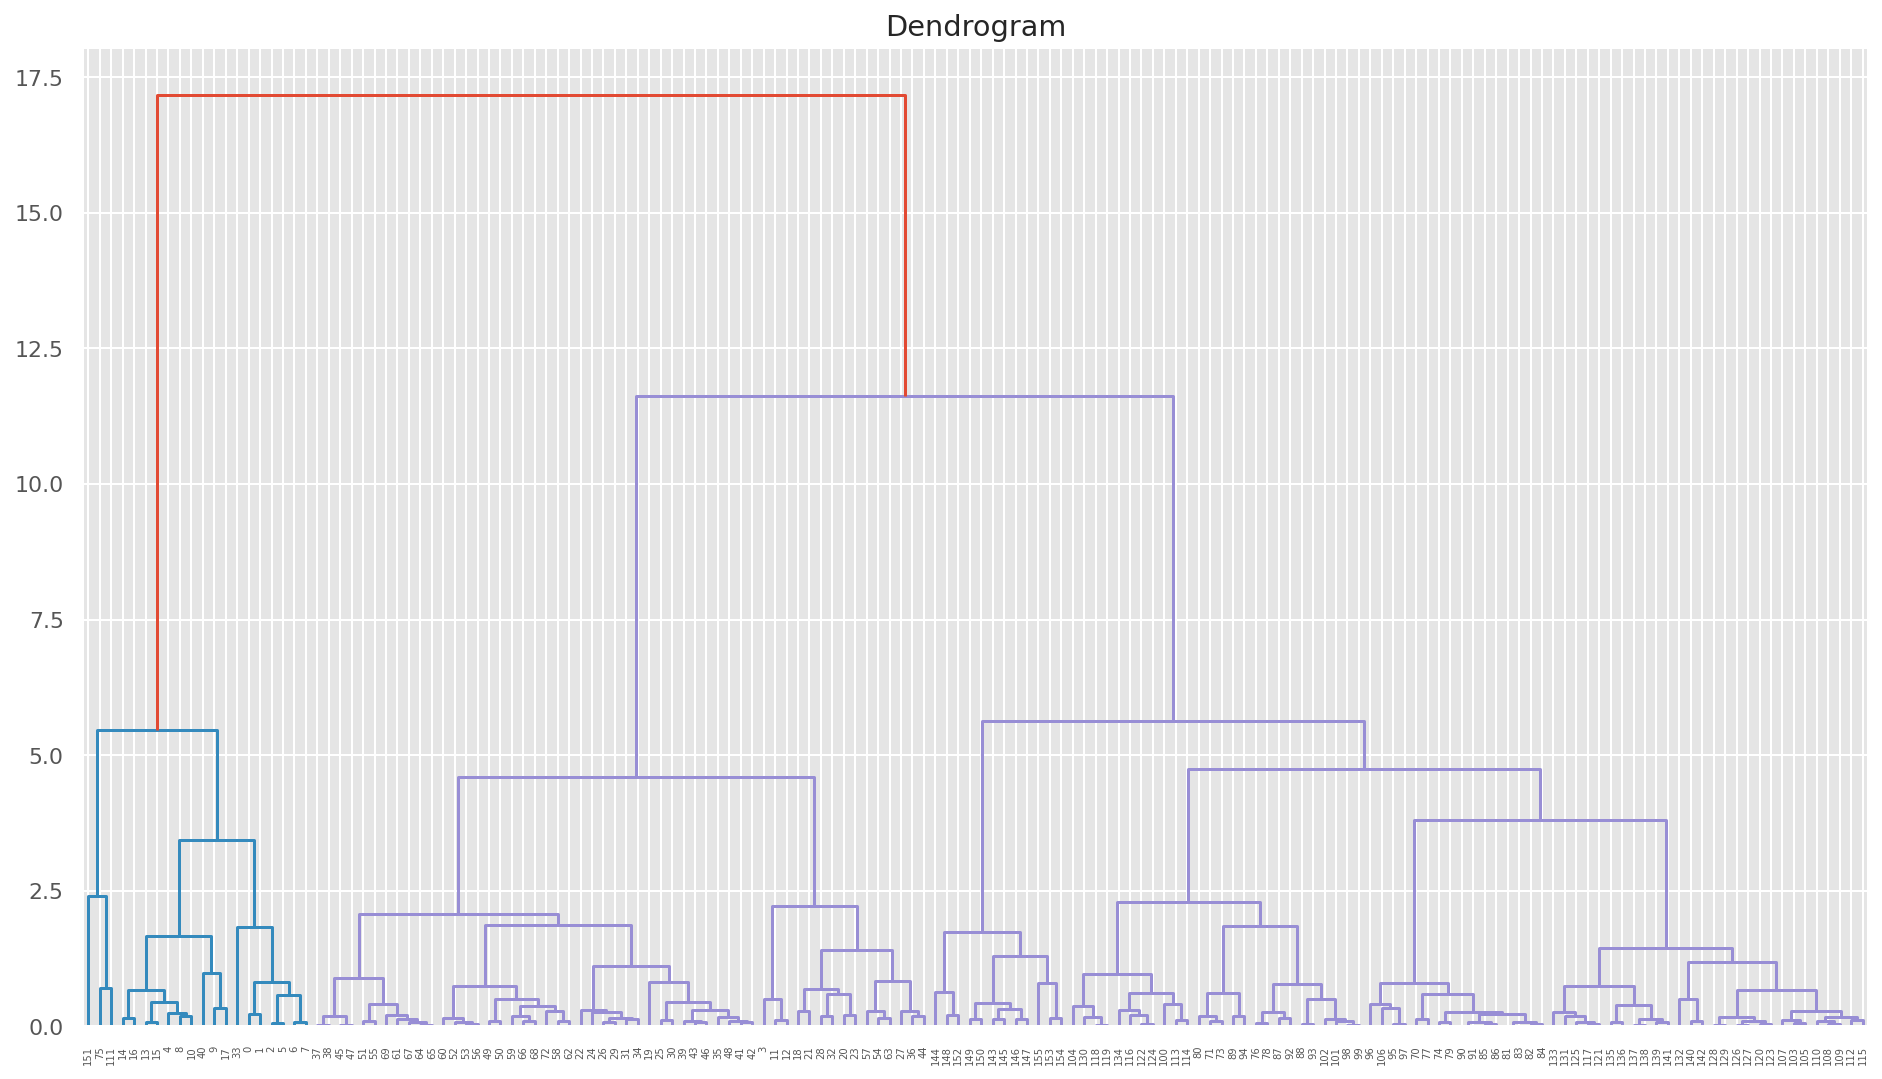

In [50]:
#hierarchical clustering
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(x_pca, method='ward'))
plt.title("Dendrogram")
plt.show()

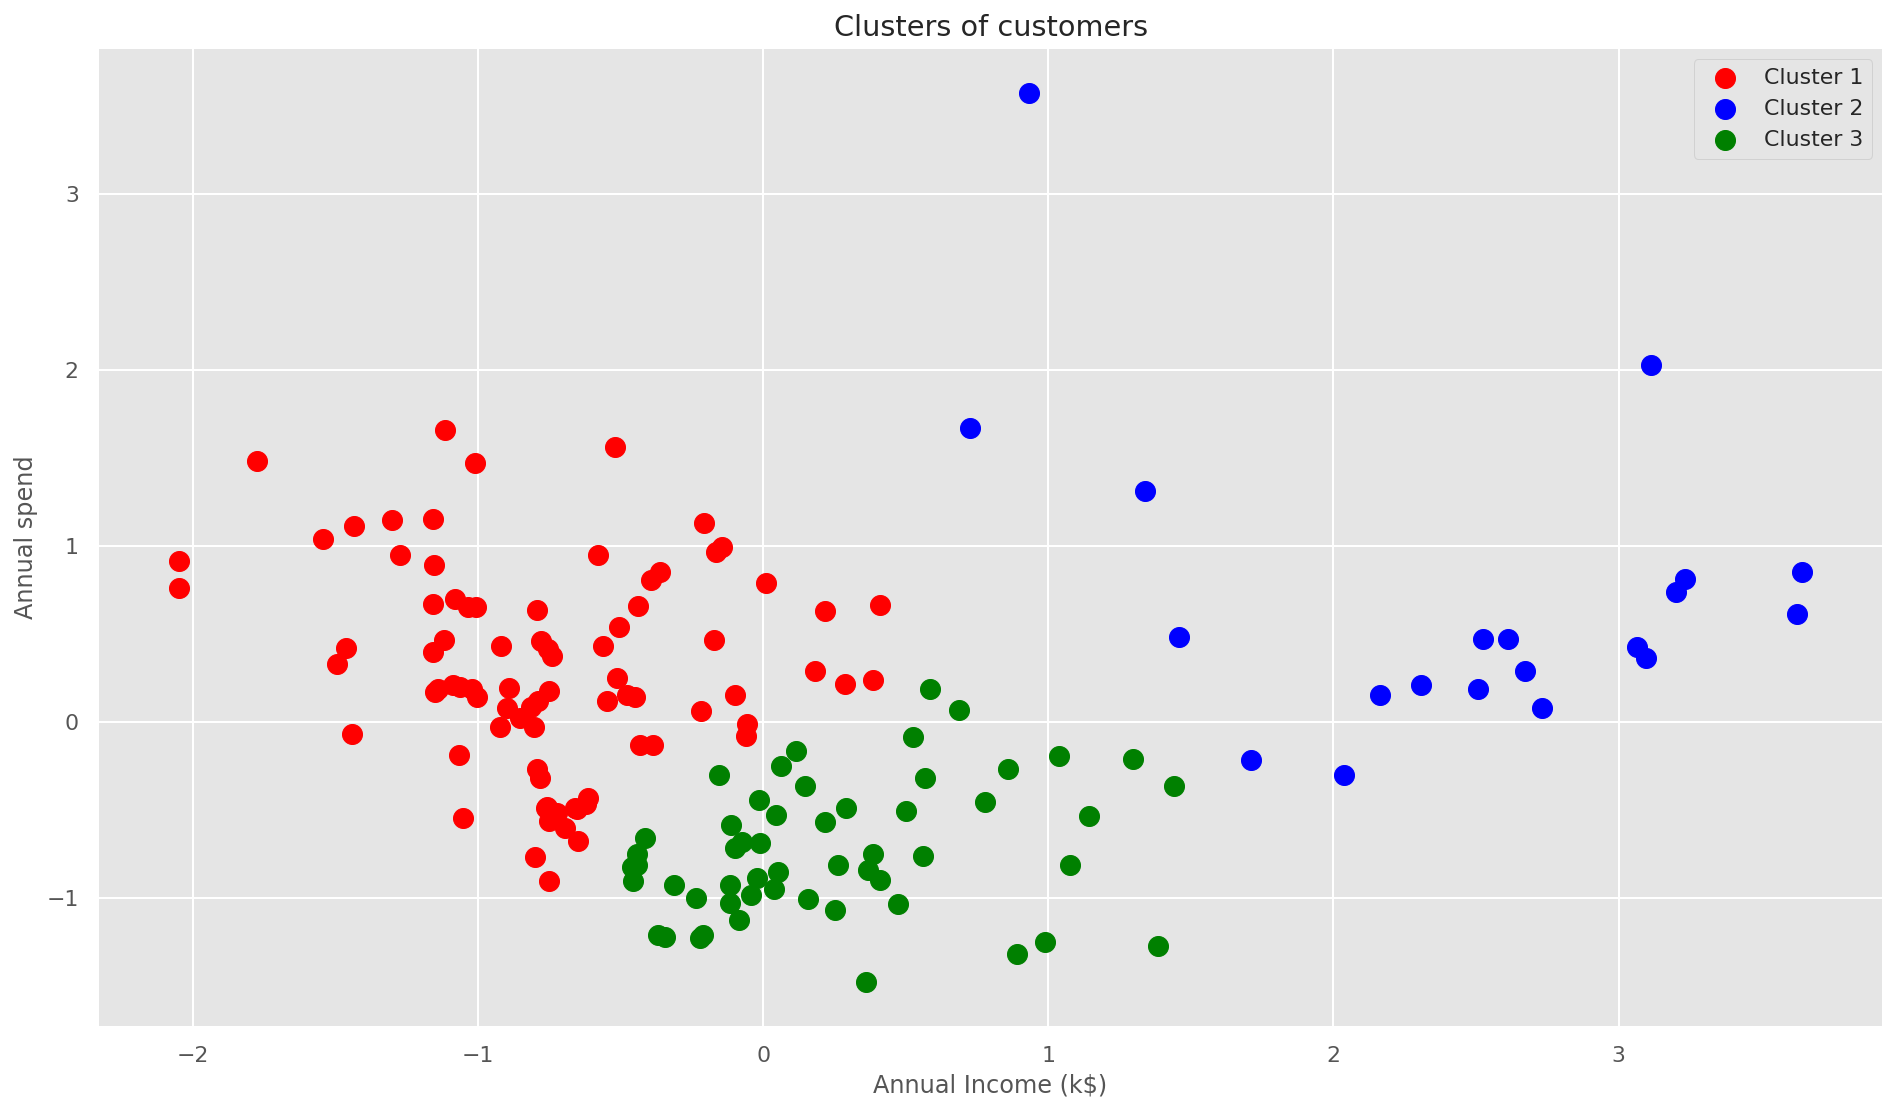

In [51]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_hc == 5, 0], X[y_hc == 5, 1], s = 100, c = 'orange', label = 'Cluster 6')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Annual spend')
plt.legend()
plt.show()